In [8]:
# import computational packages
import numpy as np
import pandas as pd 

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white');
plt.rcParams['figure.figsize'] = (8, 8)

# higher resolution plots
%config InlineBackend.figure_format ='retina'

In [2]:
high_confidence_qq_pvals = pd.read_csv('../scripts/baseline_validations/high_confidence_validations.csv').iloc[:, -2]
general_validations_qq_pvals = pd.read_csv('../scripts/baseline_validations/general_validations.csv').iloc[:, -2]
ntc_validations_qq_pvals = pd.read_csv('../scripts/baseline_validations/ntc_validations.csv').iloc[:, -2]
shuffled_validations_qq_pvals = pd.read_csv('../scripts/baseline_validations/shuffled_validations.csv').iloc[:, -2]

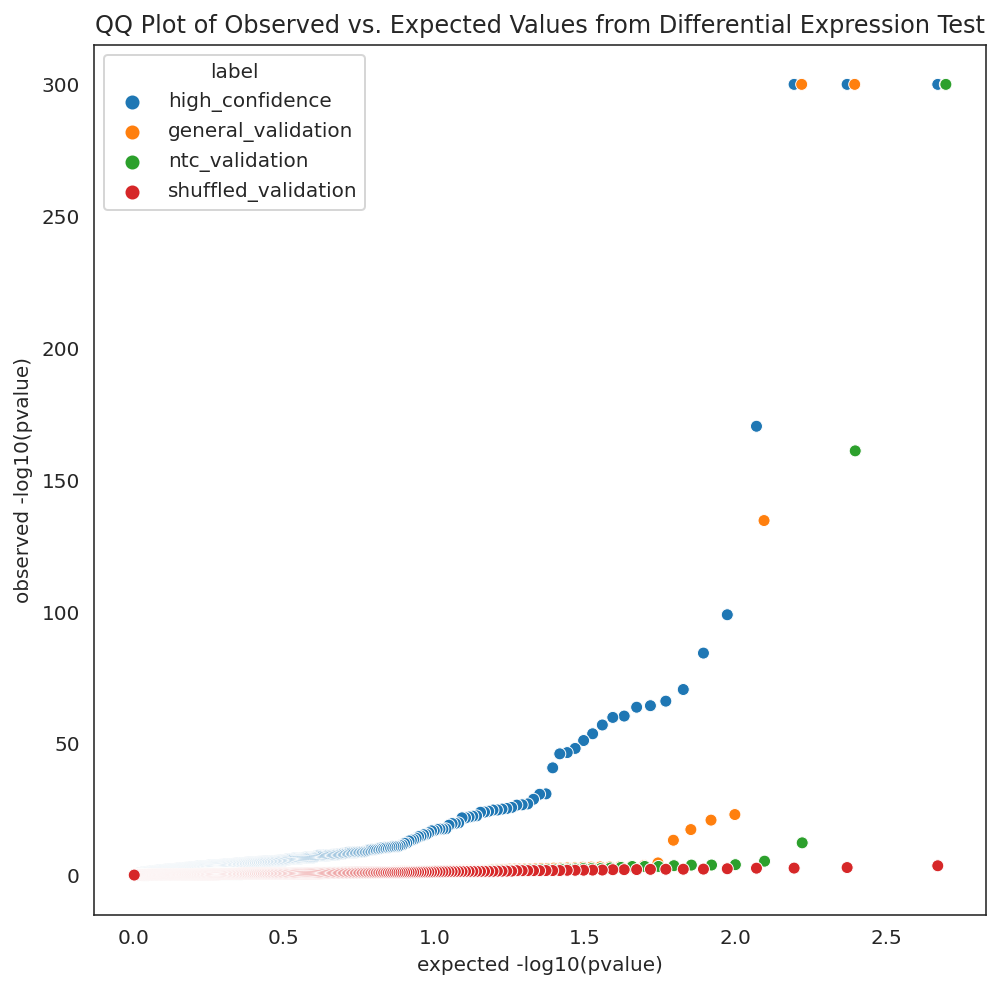

In [10]:
high_confidence_qq_df = pd.DataFrame(high_confidence_qq_pvals)
general_validations_qq_df = pd.DataFrame(general_validations_qq_pvals)
ntc_validations_qq_df = pd.DataFrame(ntc_validations_qq_pvals)
shuffled_validations_qq_df = pd.DataFrame(shuffled_validations_qq_pvals)

high_confidence_qq_df = high_confidence_qq_df.rename({'15': 'pvalue'}, axis=1)
general_validations_qq_df = general_validations_qq_df.rename({'15': 'pvalue'}, axis=1)
ntc_validations_qq_df = ntc_validations_qq_df.rename({'15': 'pvalue'}, axis=1)
shuffled_validations_qq_df = shuffled_validations_qq_df.rename({'15': 'pvalue'}, axis=1)

high_confidence_qq_df['label'] = 'high_confidence'
general_validations_qq_df['label'] = 'general_validation'
ntc_validations_qq_df['label'] = 'ntc_validation'
shuffled_validations_qq_df['label'] = 'shuffled_validation'

high_confidence_qq_df = high_confidence_qq_df.sort_values(by='pvalue')
general_validations_qq_df = general_validations_qq_df.sort_values(by='pvalue')
ntc_validations_qq_df = ntc_validations_qq_df.sort_values(by='pvalue')
shuffled_validations_qq_df = shuffled_validations_qq_df.sort_values(by='pvalue')

high_confidence_qq_df['uniform'] = np.arange(1, len(high_confidence_qq_df) + 1) / len(high_confidence_qq_df)
general_validations_qq_df['uniform'] = np.arange(1, len(general_validations_qq_df) + 1) / len(general_validations_qq_df)
ntc_validations_qq_df['uniform'] = np.arange(1, len(ntc_validations_qq_df) + 1) / len(ntc_validations_qq_df)
shuffled_validations_qq_df['uniform'] = np.arange(1, len(shuffled_validations_qq_df) + 1) / len(shuffled_validations_qq_df)

qq_df = pd.concat([high_confidence_qq_df, general_validations_qq_df, ntc_validations_qq_df, shuffled_validations_qq_df], axis=0).reset_index(drop=True)
qq_df['uniform'] = -1 * np.log10(qq_df['uniform'])
qq_df['pvalue'] = -1 * np.log10(qq_df['pvalue'] + 1e-300)

ax = sns.scatterplot(data=qq_df, x='uniform', y='pvalue', hue='label');
ax.set_title('QQ Plot of Observed vs. Expected Values from Differential Expression Test');
ax.set_xlabel('expected -log10(pvalue)');
ax.set_ylabel('observed -log10(pvalue)');

fig = ax.get_figure();
fig.savefig('validation_qqplot.png');

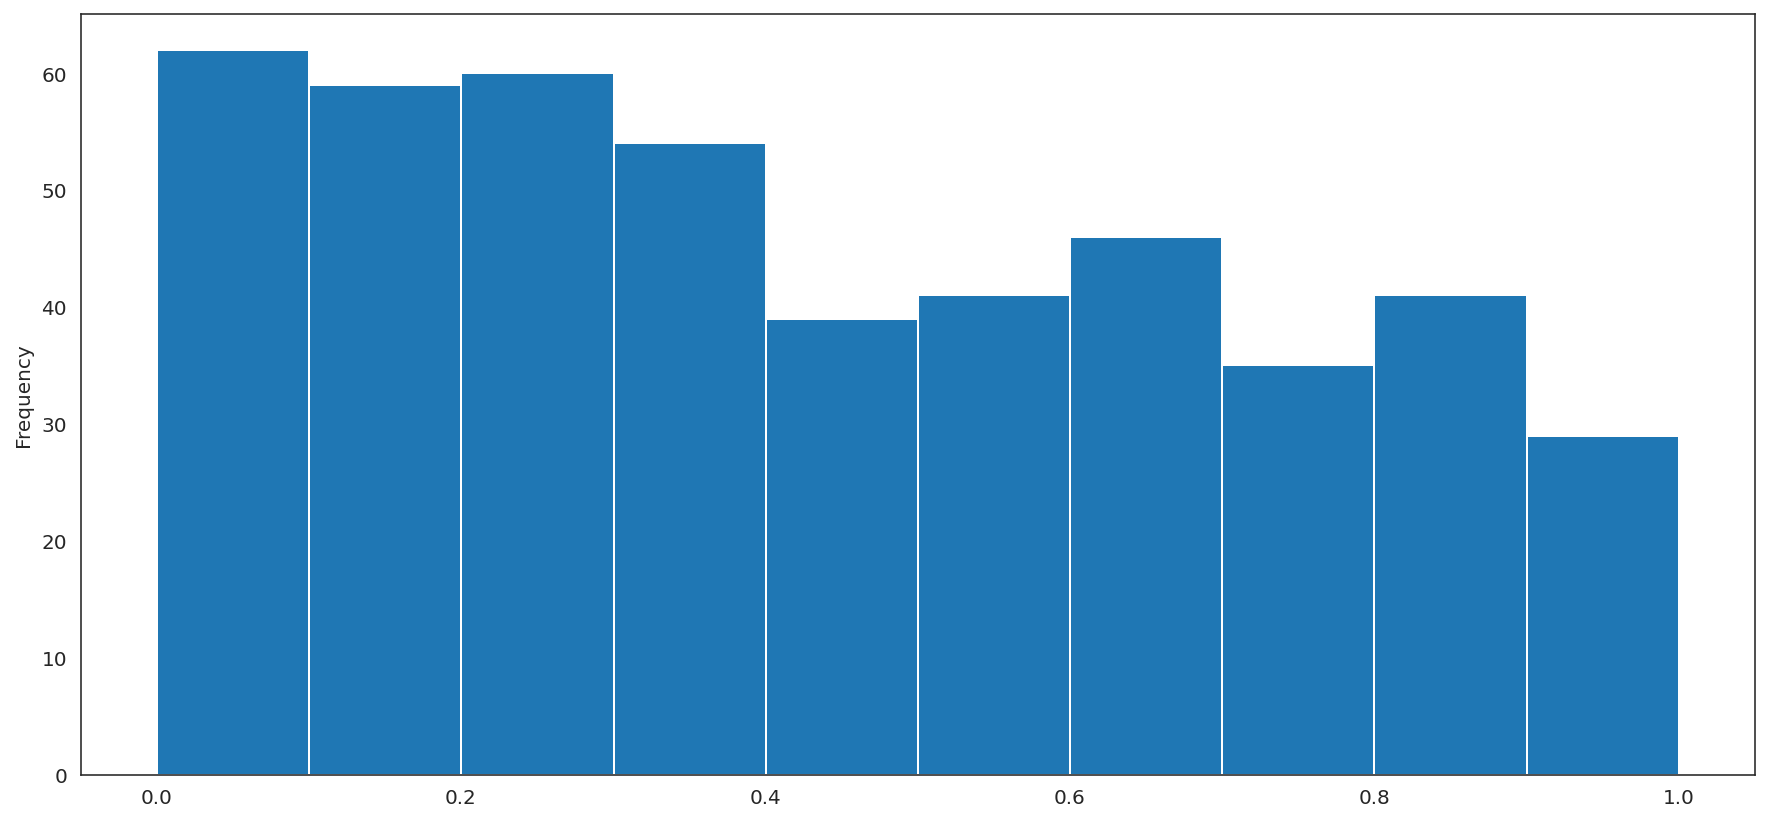

In [7]:
shuffled_validations_qq_pvals.plot(kind='hist');

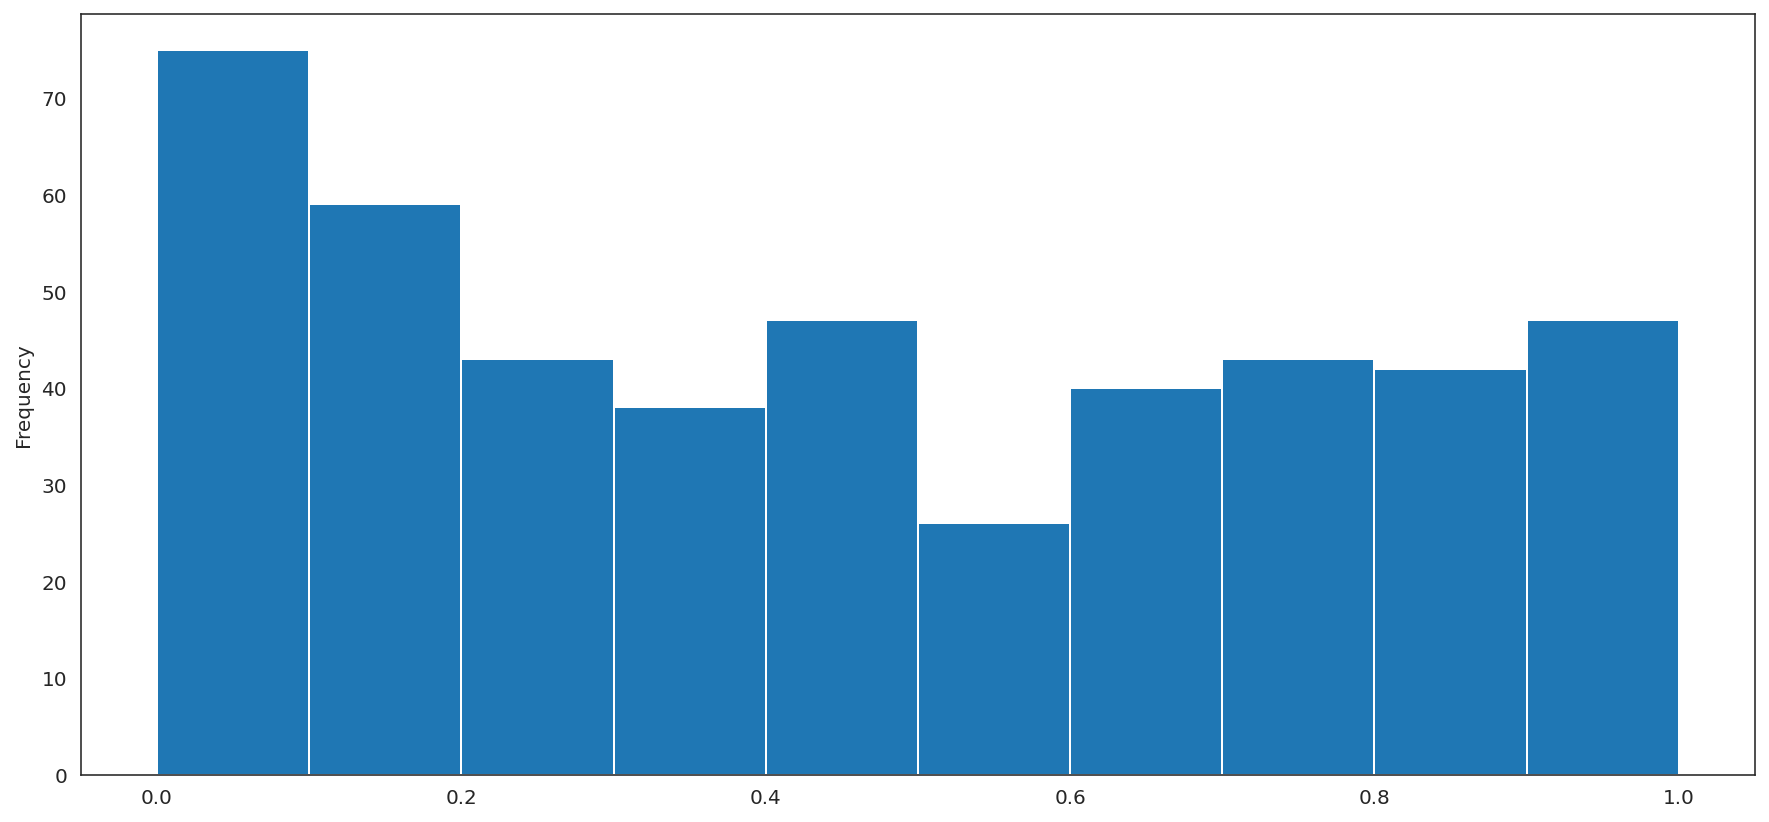

In [14]:
ntc_validations_qq_pvals.plot(kind='hist');

<AxesSubplot:ylabel='Frequency'>

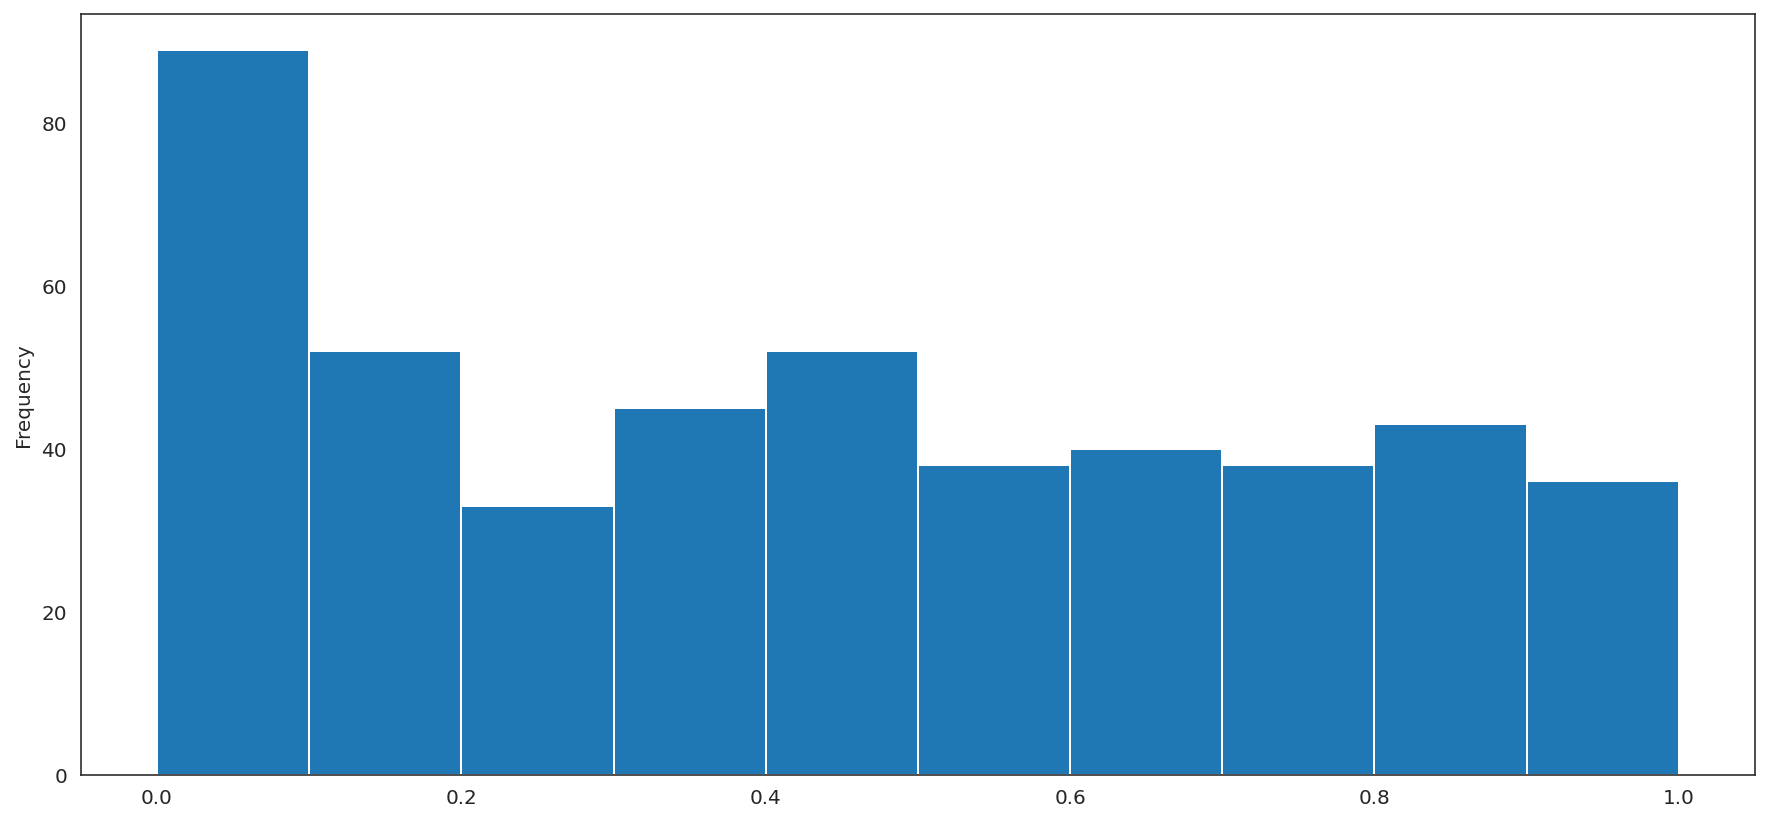

In [15]:
general_validations_qq_pvals.plot(kind='hist')

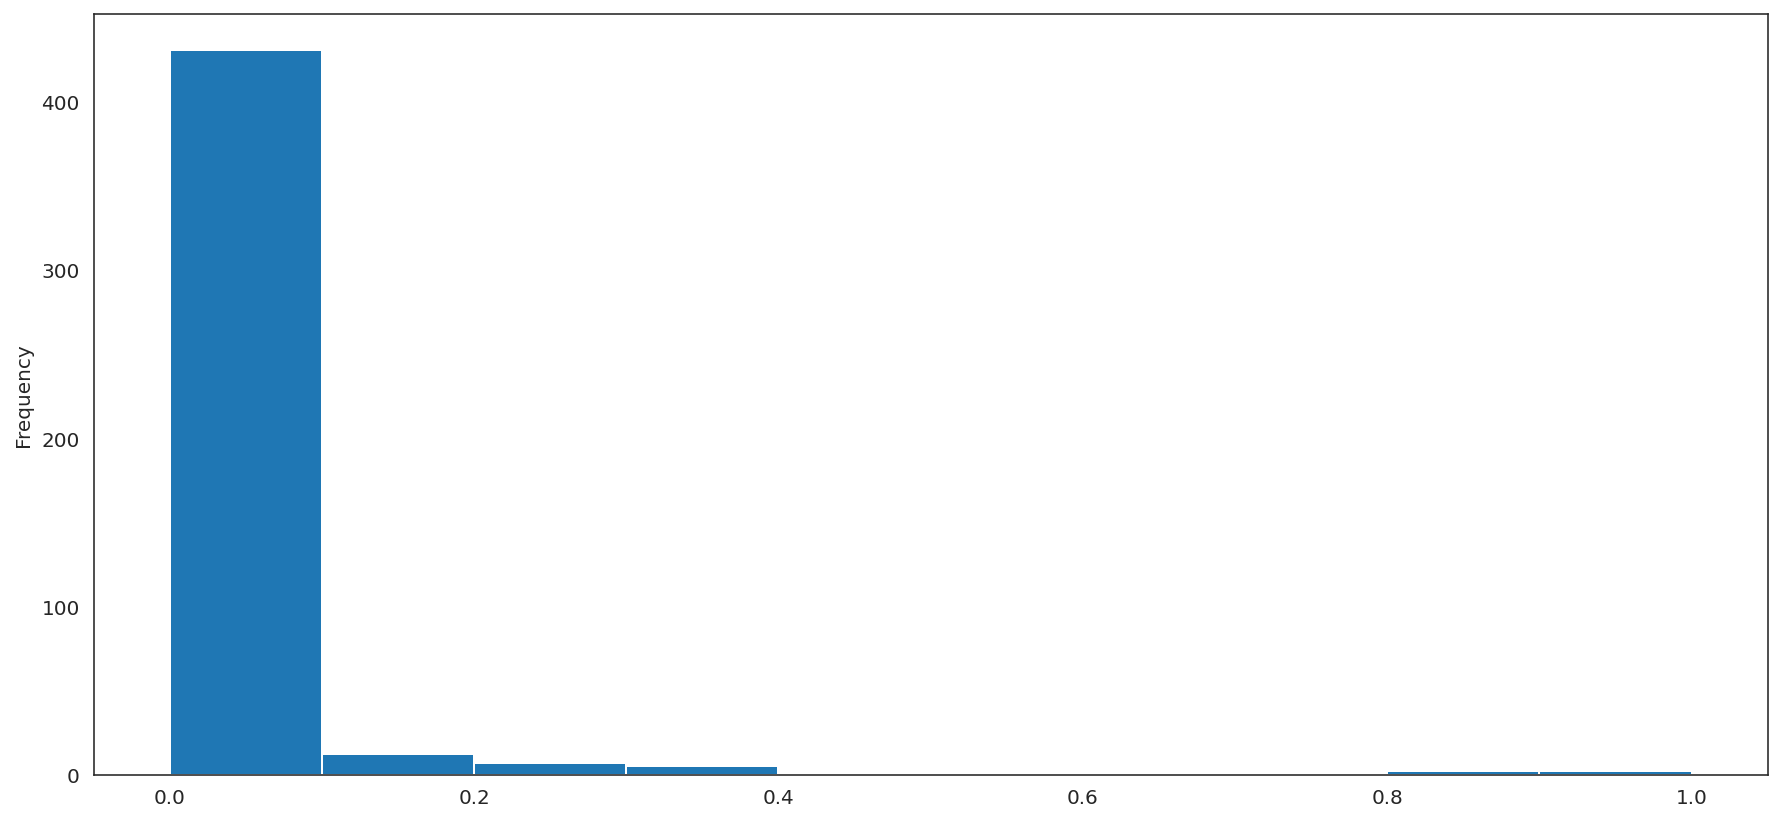

In [4]:
high_confidence_qq_pvals.plot(kind='hist');